<a href="https://colab.research.google.com/github/Kibuye24/Factors-Affecting-Survival-in-Titanic/blob/main/Kibuye_9_decision_tree_exercise_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Factors Affecting Survival in the Titanic

## 1. Importing libraries and Viewing the dataset

In [1]:
#Importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
#Loading the dataset
df = pd.read_csv("titanic.csv")

In [3]:
#Looking at the top of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Viewing the bottom of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Looking at the shape of the dataset
df.shape

(891, 12)

There are 12 variables and 891 records

In [6]:
#Confirming the dataset has the correct data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. Data Cleaning

In [7]:
#Checking for duplicates
df.duplicated().sum()

0

There are no duplicate values

In [8]:
#Dropping columns that we will not use
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

We don't need the name of the passengers and the passenger Id is just the indexing of the passengers. We therefore drop those columns without using feature importance. They are not necessary to the study.

In [9]:
#Changing the format of the column names by lowering the strings
df.rename(columns= str.lower, inplace = True)

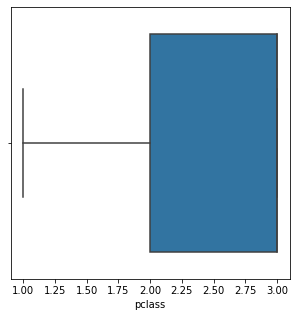

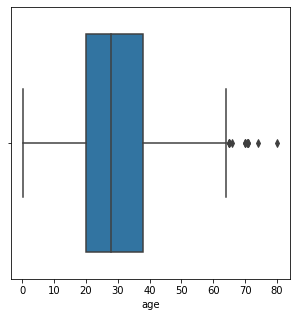

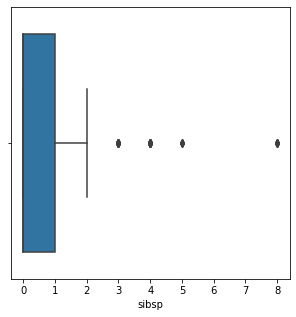

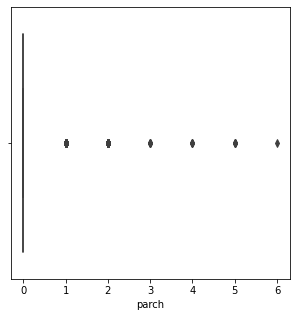

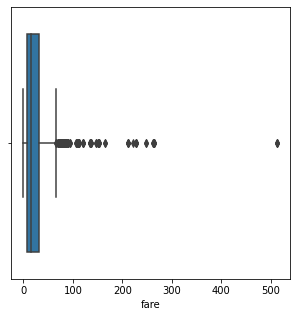

In [10]:
#Checking for outliers in the data
# Checking for Outliers

cols = df.drop(columns = ['sex', 'embarked', 'survived'])

for i in cols:
    fig = plt.figure(figsize = (5,5))
    sns.boxplot(df[i])
        
plt.show()

There is presence of some outliers. However, we will not drop them as they are real values and not due to an error. Further investigation on the outliers will be done when checking for anomalies.

In [11]:
#Checking for missing data
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [12]:
#Dealing with the missing data
#We will drop the two columns where embarked is null
#We will also drop the null values in the age column. Filling with mean or median could change the accuracy of our model
df.dropna(inplace=True)

In [13]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [14]:
#Checking for anomalies
for i in cols:
    u = df[i].unique()
    print('Unique values of ', i , 'is' , u)

Unique values of  pclass is [3 1 2]
Unique values of  age is [22.   38.   26.   35.   54.    2.   27.   14.    4.   58.   20.   39.
 55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
Unique values of  sibsp is [1 0 3 4 2 5]
Unique values of  parch is [0 1 2 5 3 4 6]
Unique values of  fare is [  7.25    71.2833   7.925   53.1      8.05    51.8625  21.075   11.1333
  30.0708  16.7     26.55    31.275    7.8542  16.      29.125   18.
  26.      13.       8.0292  35.5     31.3875 263.      27.7208  10.5
  82.1708  52.      11.2417   9.475   21.      41.5792   7.8792  17.8
  39.6875   7.8     7

There are no anomalies in the dataset

## 3. Exploratory Data Analysis

### 3.1 Univariate Analysis

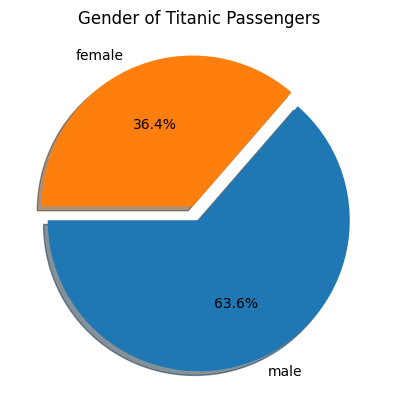

In [15]:
#Checking the gender of the people aboard the titanic
accounts = df['sex'].value_counts().head(4)
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0,0.1), shadow=True, startangle=180)
plt.title('Gender of Titanic Passengers', color='black')
plt.show()

Most passengers aboard the titanic were male

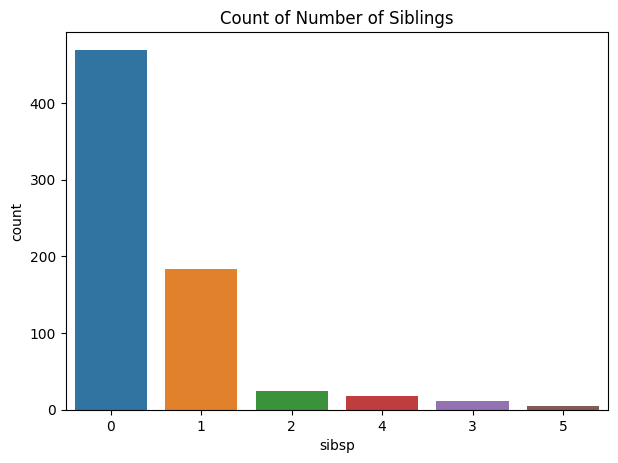

In [16]:
#Checking the number of siblings that people in the titanic had
plt.figure(dpi = 100, figsize = (7,5))
sns.countplot(df['sibsp'], order=df['sibsp'].value_counts().index)
plt.title("Count of Number of Siblings")
plt.show()

Most people didn't have a sibling on the titanic.

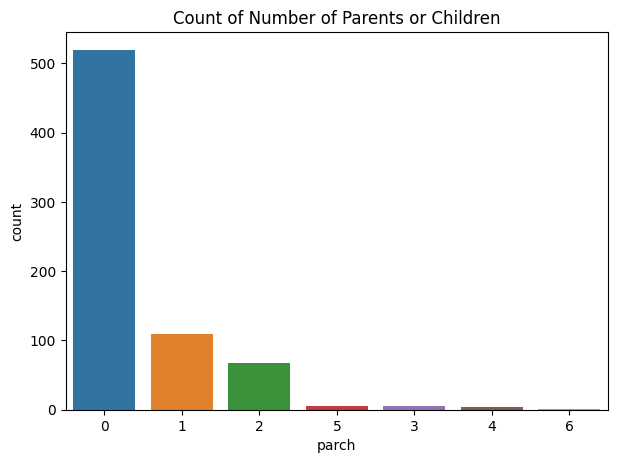

In [17]:
#Checking the number of parents or children that people in the titanic had
plt.figure(dpi = 100, figsize = (7,5))
sns.countplot(df['parch'], order=df['parch'].value_counts().index)
plt.title("Count of Number of Parents or Children")
plt.show()

Most people didn't have a parent or child

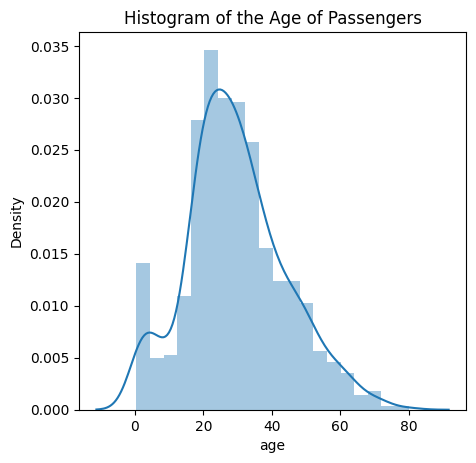

In [18]:
# Histogram of the age of passengers
plt.figure(dpi = 100, figsize = (5,5))
sns.distplot(df['age'])
plt.title("Histogram of the Age of Passengers")
plt.show()

Most passengers are between 20 and 40 years of age.

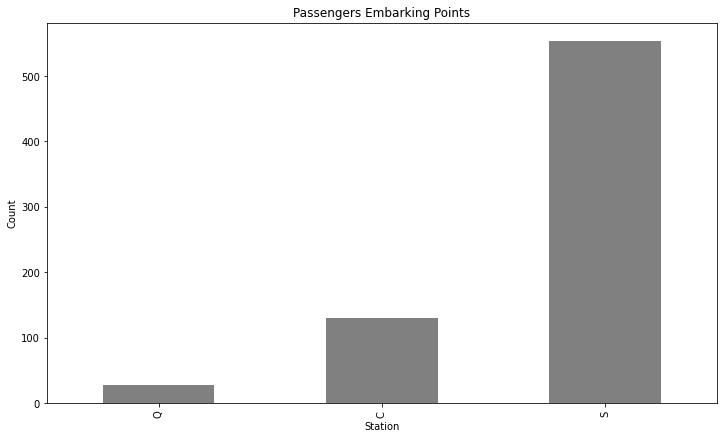

In [19]:
#Looking at the most famous place of embarking the titanic
plt.figure(figsize = (12,7))
df.groupby('embarked').size().sort_values(ascending = True).plot(kind='bar', color='grey')
plt.title('Passengers Embarking Points')
plt.ylabel('Count')
plt.xlabel('Station')
plt.show()

Most passengers embarked from Southampton

In [20]:
#A table showing the number of passengers who survived or not
df['survived'].value_counts()

0    424
1    288
Name: survived, dtype: int64

Most passengers did not survive

In [21]:
#Mean of the dataset
cols.mean()

pclass     2.308642
age       29.699118
sibsp      0.523008
parch      0.381594
fare      32.204208
dtype: float64

In [22]:
#Mode of the dataset
cols.mode()

,pclass,age,sibsp,parch,fare
0,3,24.0,0,0,8.05


In [23]:
#Median of the dataset
cols.median()

pclass     3.0000
age       28.0000
sibsp      0.0000
parch      0.0000
fare      14.4542
dtype: float64

In [24]:
#Upper and lower quantiles of the dataset
cols.quantile([0.25, 0.75])

,pclass,age,sibsp,parch,fare
0.25,2.0,20.125,0.0,0.0,7.9104
0.75,3.0,38.000,1.0,0.0,31.0000


In [25]:
#Standard deviation of the dataset
cols.std()

pclass     0.836071
age       14.526497
sibsp      1.102743
parch      0.806057
fare      49.693429
dtype: float64

Only age and fare have a high standard deviation

In [26]:
#Variance of the dataset
cols.var()

pclass       0.699015
age        211.019125
sibsp        1.216043
parch        0.649728
fare      2469.436846
dtype: float64

Only age and fare have a high variance

In [27]:
#Finding the skew of the dataset
cols.skew()

pclass   -0.630548
age       0.389108
sibsp     3.695352
parch     2.749117
fare      4.787317
dtype: float64

Our data is positively skewed apart from pclass

In [28]:
#Finding the kurtosis
cols.kurt()

pclass    -1.280015
age        0.178274
sibsp     17.880420
parch      9.778125
fare      33.398141
dtype: float64

There are extreme values in siblings and fare.

### 3.1 Bivariate Analysis

<Figure size 2000x2000 with 0 Axes>

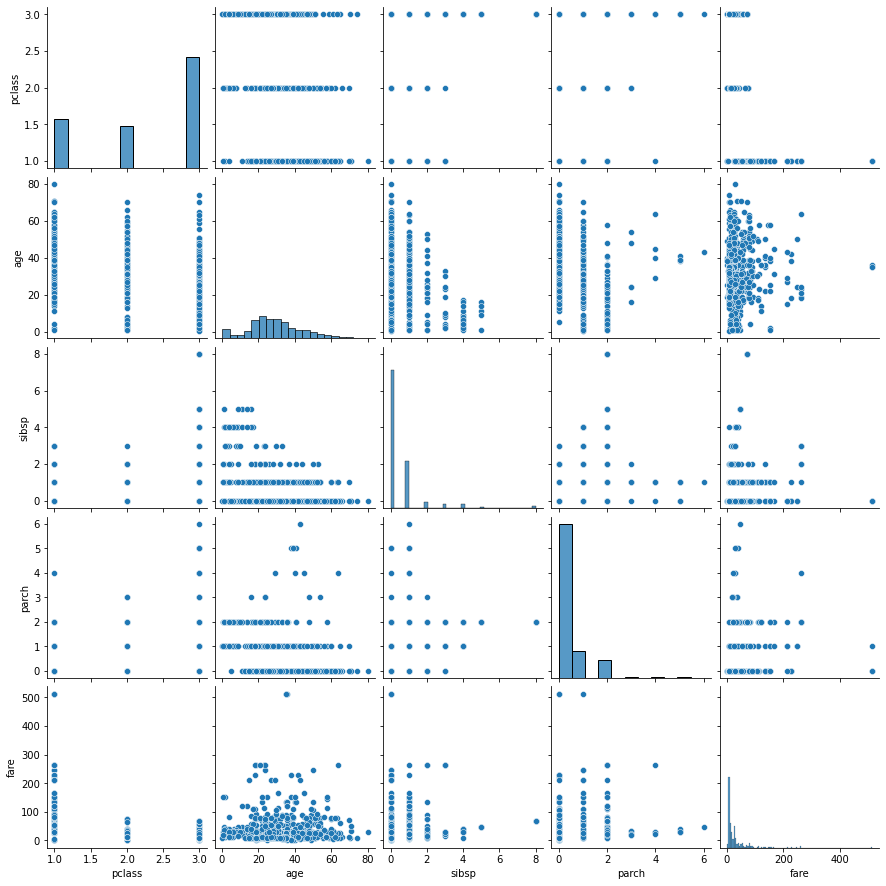

In [29]:
#Pairplot showing the relationship between the various colums
plt.figure(figsize = (20, 20), dpi=100)
sns.pairplot(cols)

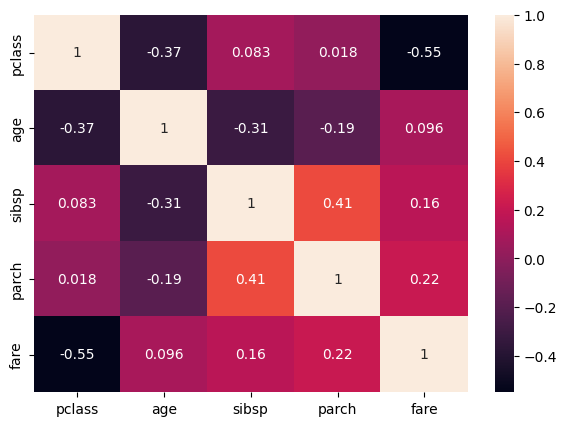

In [30]:
#Correlation
correlation = cols.corr()
fig, ax = plt.subplots(figsize=(7,5), dpi = 100)
sns.heatmap(correlation, annot=True)

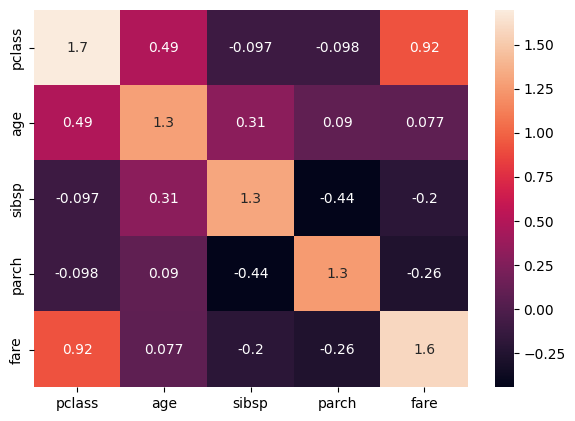

In [31]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)

# This is calculated using linear algebra inverse function
plt.figure(dpi = 100, figsize = (7,5))
sns.heatmap(pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns), annot = True)

There are no cases of multicollinearity

### 3.3 Multivariate Analysis

In [32]:
#We will label encode our dataset for regression analysis and model training
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
df1 = df.apply(LabelEncoder().fit_transform)
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,2,1,28,1,0,16,2
1,1,0,0,51,1,0,180,0
2,1,2,0,34,0,0,32,2
3,1,0,0,47,1,0,163,2
4,0,2,1,47,0,0,34,2


In [33]:
X = df1.drop(columns = ['survived'])
y = df1['survived']

In [34]:
#Importing the required libraries
from sklearn.model_selection import train_test_split
#splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
#Creating and fitting our model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
#Making predictions using our model
y_pred = model.predict(X_test)

In [37]:
#Findinf the root mean squared error and the score of our model
from sklearn import metrics
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of the model is: ", model.score(X_test, y_test))

Root mean squared error:  0.37858830641098
The score of the model is:  0.414047004497213


The model is not strong with only 41% accuracy

## 4. Challenging the Solution

In [38]:
#Splitting the dataset to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [39]:
len(X_train)

569

In [40]:
len(X_test)

143

In [41]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [42]:
#Fitting the train sets into the model
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
#Checking the score of the model
model.score(X_test,y_test)

0.8111888111888111

The model now has a better score of 81.11%

In [45]:
#Using decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
# Create a decision tree classifier

tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

In [47]:
#Checking the score of the model
model.score(X_test,y_test)

0.9392523364485982

A decision tree regressor has a higher score of 93.92%

In [55]:
#Comparing the results obtained
comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
comparison_frame.describe()

,Actual,Predicted
count,214.000000,214.00000
mean,0.415888,0.44081
std,0.494030,0.49423
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,1.00000
max,1.000000,1.00000


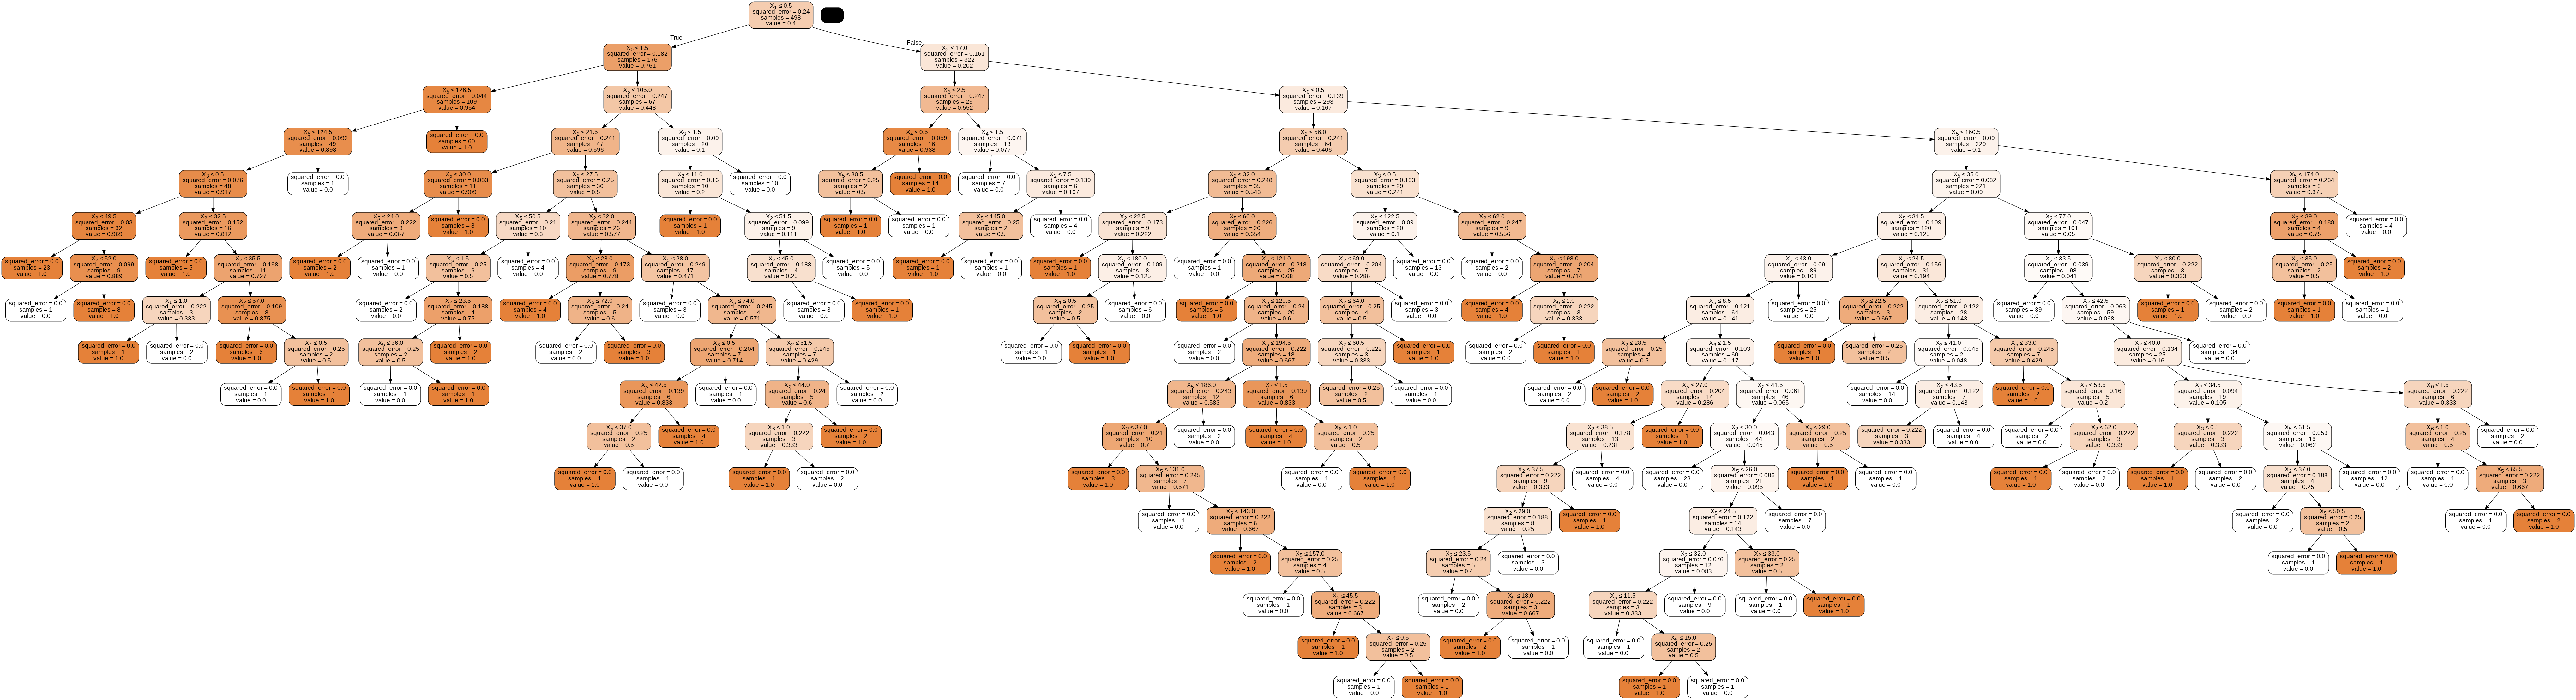

In [48]:
#Visualizing the findings
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['Survived', 'Did Not Survive'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())

## Conclusion

The decision tree regressor is the best model to use. It has a 94% accuracy.